<a href="https://colab.research.google.com/github/nalymugwe/Trading_strategy_via_time_series_analysis/blob/main/151386_TSAF_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series and Forecasting Project**



### **Project Objective**

Formulate a trading strategy from a selected stock.



### **Project tasks**

*   Explore trading data.
*   Formulate 2 trading strategies and compare their perfromance metrics
*   Forecast with the most ideal strategy.





# **1. Explore the Trading Data**

In [13]:
# Install package for yahoo finance to download trading data

!pip -q install yfinance

In [14]:
#Import libraries needed

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


import yfinance as yf

from statsmodels.tsa.stattools import adfuller


In [15]:
# Upload airbnb data from yfinance

abnb_data = yf.download('ABNB', start = '2020-12-10', end = '2023-2-28')

[*********************100%***********************]  1 of 1 completed


In [16]:
# Preview the data

abnb_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [17]:
# Set the size of the plots
plt.rcParams['figure.figsize'] = [15, 6]

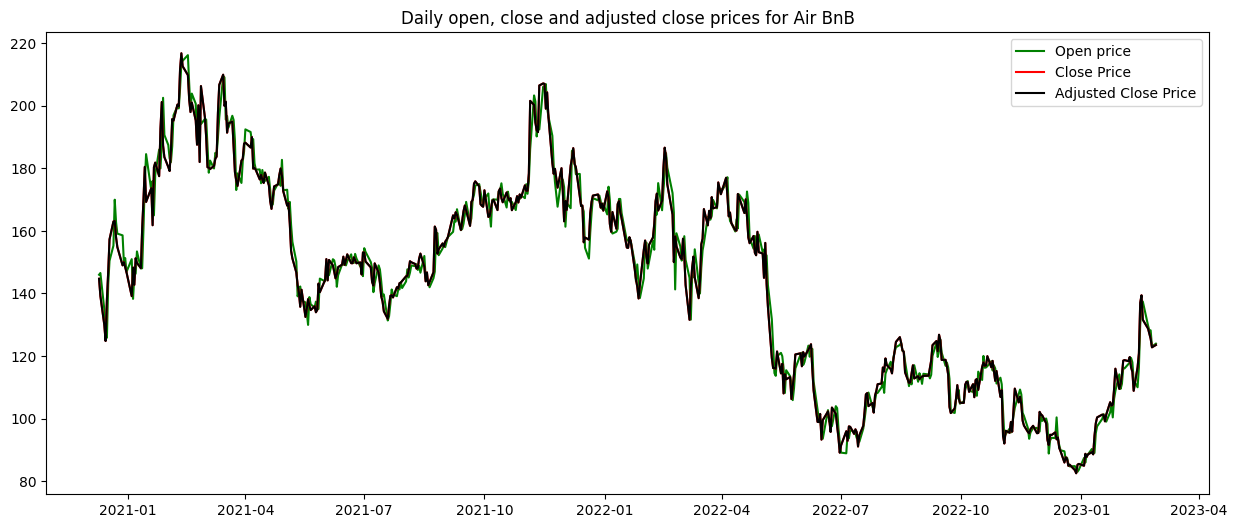

In [18]:
# Compare the open, close and adjusted close
plt.plot(abnb_data['Open'], color='green', label = 'Open price')

# Plot the daily low price
plt.plot(abnb_data['Close'], color='red', label = 'Close Price')

# Plot the Adj close price
plt.plot(abnb_data['Adj Close'], color='black', label = 'Adjusted Close Price')

plt.title('Daily open, close and adjusted close prices for Air BnB')
plt.legend()
plt.show()

In [19]:
# Define the candlestick data
candlestick = go.Candlestick(
    x = abnb_data.index,
    open = abnb_data['Open'],
    high = abnb_data['High'],
    low = abnb_data['Low'],
    close = abnb_data['Close'])

# Create a candlestick figure
fig = go.Figure(data = [candlestick])
fig.update_layout(title = 'AirBNB prices')

# Show the plot
fig.show()

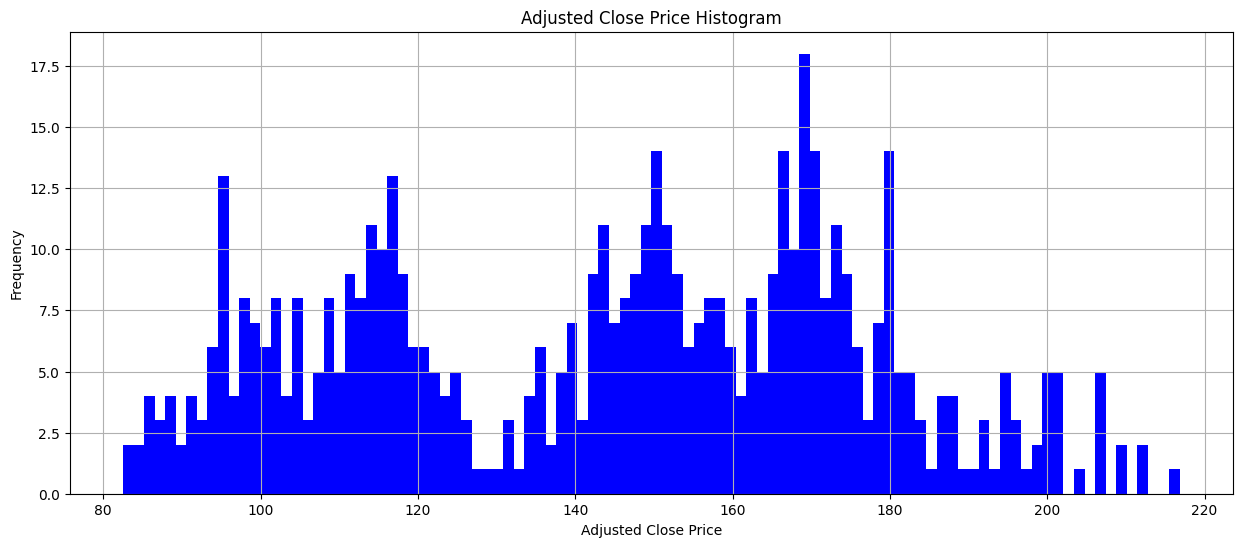

In [20]:
# Plot a histogram of the Adjusted Close Price
abnb_data['Adj Close'].hist(bins=100, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Close Price')
plt.title('Adjusted Close Price Histogram')
plt.show()

In [21]:
#Test for stationarity

#Print the results of the AD Fuller test
result_1 = adfuller(abnb_data['Adj Close'])
print(f'ADF Statistic: {result_1[0]}')
print('..................................')
print(f'p-value: {result_1[1]}')
print('..................................')
if result_1[1] > 0.05:
    print('The time series is not stationary.')
else:
    print('The time series is stationary.')

ADF Statistic: -1.915640991071359
..................................
p-value: 0.32473924639538304
..................................
The time series is not stationary.


In [22]:
# Convert to stationary time series
abnb_data['Returns'] = np.log(abnb_data['Adj Close']).diff()

#Drop the null values
abnb_data.dropna(inplace=True)

#Print the results of the AD Fuller test
result_2 = adfuller(abnb_data['Returns'])
print(f'ADF Statistic: {result_2[0]}')
print('..................................')
print(f'p-value: {result_2[1]}')
print('..................................')
if result_2[1] > 0.05:
    print('The time series is not stationary.')
else:
    print('The time series is stationary.')

ADF Statistic: -14.712344319662762
..................................
p-value: 2.8346046816852846e-27
..................................
The time series is stationary.


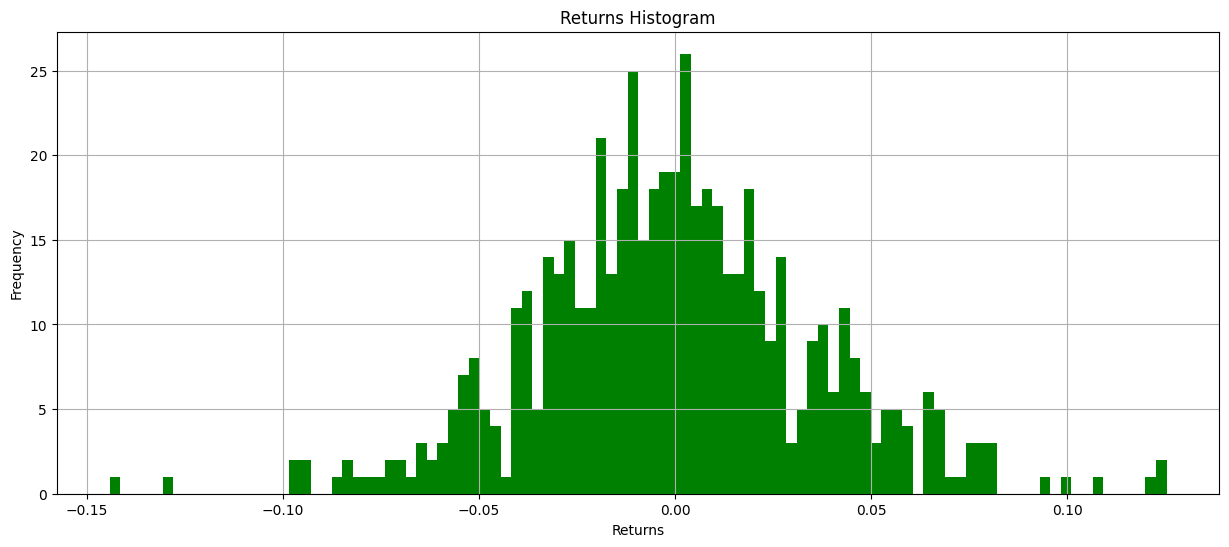

In [23]:
# Plot a histogram of the Returns Price

abnb_data['Returns'].hist(bins=100, color='green')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.title('Returns Histogram')
plt.show()

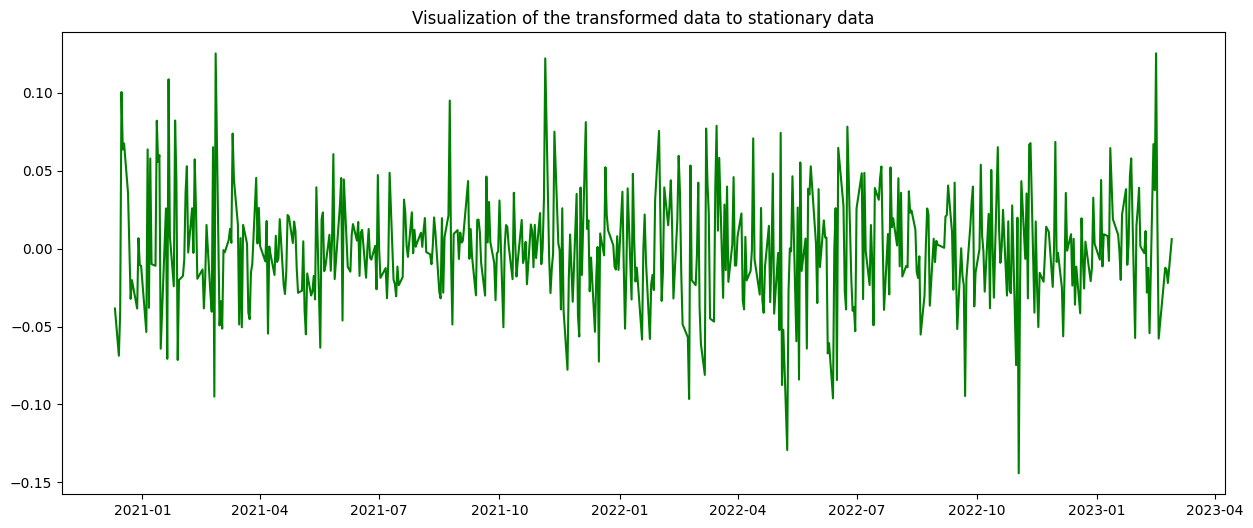

In [24]:
# Plot the stationary data

plt.plot(abnb_data['Returns'], color='green')
plt.title('Visualization of the transformed data to stationary data')
plt.show()

## **Insights on Data Exploration**

**Line plot on comparison of the prices**

The daily price for the Air Bnb stock has been quite volatile. For this particular stock, the close price is the same as the adjusted close price though there are a few instances where the close price is not aligned with the adjusted close price. This could have been influenced by a cash payout.

The open price is different from the close price as certain conditions can happen after the close of market the previous day to influence the open price the following day.


**Candlestick Chart**

A candlestick chart helps to put multiple pieces of information in one chart. The bottom chart is an interactive chart that helps you select a time period one is interested in.

Typically the green candle (bullish) represents the close price above the open price so the prices are starting to rise. The red candle (bearish) represents the close price below the open price thus the prices are starting to decline.

The length of the candlestick shows the difference between the high price and the low price. A long candlestick shows that the difference is high whereas a short candlestick shows the difference between the two price is low.

Additionally, the candlestick has a wick at either ends of the 'body'. If the upper wick on a red candle is short, it indicates that the open price that day was near the high price of the day. A short upper wick on a green candle dictates that the close price was near the high price.


**Augmented Dickey Fuller Test**

From the test done, the test statistic (-1.9) is higher than the critical value at 5% (-2.8) we thus conclude that the data series in non-stationary.

The data was converted into a stationary data series through log transformation as it will be more effective when creating a trading strategy. The test was re-done and the test statistic (-14.2) was lower than the critical value at 5% (7.1) and thus conclude that the data series is stationary


**Histogram Analysis**

The first histogram shows the distribution of the adjusted close price. The peaks in this chart are multi-peaked and the data points lie between 81 and 201. There are several data points that lie between 202 and 2016.

The second histogram shows the distribution of data of the daily returns. The above histogram shows the majority of the daily returns are between -9% and +9% but occasionally the prices had big negative or positive 10% changes, so the stock is volatile.



# **2. Formulate a trading strategy**


## **2.1 Mean reversion strategy**

In [25]:
# Review the data

abnb_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,-0.038461
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,-0.068736
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,-0.040822
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,0.100469
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,0.063591


In [26]:
# Implement mean-reverting trading strategy

def mean_reversion_strategy(df, lookback, std_dev):

    # Moving Average
    df['Moving_Average'] = df.Returns.rolling(lookback).mean()
    # Moving Standard Deviation
    df['Moving_std_dev'] = df.Returns.rolling(lookback).std()

    # Upper band and lower band
    df['Upper_Band'] = df.Moving_Average + std_dev * df.Moving_std_dev
    df['Lower_Band'] = df.Moving_Average - std_dev * df.Moving_std_dev

    # Long positions
    df['Long_Entry'] = df.Returns < df.Lower_Band
    df['Long_Exit'] = df.Returns >= df.Moving_Average

    df['Positions_Long'] = np.nan
    df.loc[df.Long_Entry, 'Positions_Long'] = 1
    df.loc[df.Long_Exit, 'Positions_Long'] = 0
    df.Positions_Long = df.Positions_Long.fillna(method='ffill')

    # Short positions
    df['Short_Entry'] = df.Returns > df.Upper_Band
    df['Short_Exit'] = df.Returns <= df.Moving_Average

    df['Positions_Short'] = np.nan
    df.loc[df.Short_Entry, 'Positions_Short'] = -1
    df.loc[df.Short_Exit, 'Positions_Short'] = 0

    df.Positions_Short = df.Positions_Short.fillna(method='ffill')

    # Positions
    df['Positions'] = df.Positions_Long + df.Positions_Short

    return df

In [27]:
# Run the mean -reverting strategy function on the data

df = mean_reversion_strategy(abnb_data, 30, 2)

In [28]:
# Calculate the cumulative returns of the mean reverting strategy

df['Strategy_Returns_MRS'] = df.Positions.shift(1) * df.Returns
df['Cumulative_Returns_MRS'] = (df.Strategy_Returns_MRS+1).cumprod()
print("The total strategy returns for the mean reverting strategy is %.2f" % ((df['Cumulative_Returns_MRS'].iloc[-1]-1)*100))

The total strategy returns for the mean reverting strategy is 3.50


In [29]:
# Calculate performance metrics (Sharpe ration and Max drawdown)
sharpe_ratio = (df.Returns.mean() / df.Returns.std()) * (252 ** 0.5)
max_drawdown = (df.Cumulative_Returns_MRS / df.Cumulative_Returns_MRS.cummax() - 1).min()

print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Max Drawdown: {max_drawdown:.2f}')


Sharpe Ratio: -0.12
Max Drawdown: -0.34


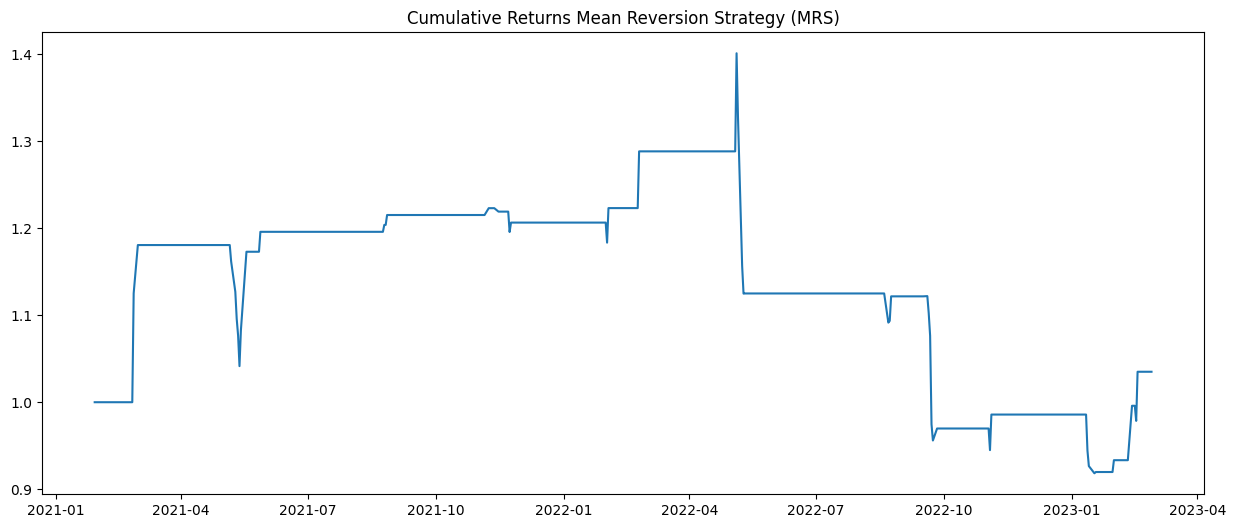

In [30]:
# Visualize the cumulative returns

plt.plot(abnb_data['Cumulative_Returns_MRS'])
plt.title('Cumulative Returns Mean Reversion Strategy (MRS)')
plt.show()

## **2.2 Trend following strategy**

In [31]:
# Calculating 50-day and 200-day simple moving averages

abnb_data['SMA50'] = abnb_data['Adj Close'].rolling(window=50).mean()
abnb_data['SMA200'] = abnb_data['Adj Close'].rolling(window=200).mean()

# Generating signals based on the moving average crossover
abnb_data['Signal_SMA'] = 0
abnb_data.loc[abnb_data['SMA50'] > abnb_data['SMA200'], 'Signal_SMA'] = 1

# Applying the trading strategy
abnb_data['Position_SMA'] = abnb_data['Signal_SMA'].shift(1)
abnb_data['Position_SMA'].fillna(method='ffill', inplace=True)
abnb_data['StrategyReturns_SMA'] = abnb_data['Position_SMA'] * abnb_data['Returns']


In [32]:
# Print the performance metrics
print(f"Cumulative Strategy Returns: {abnb_data['StrategyReturns_SMA'].sum()}")
print("........................................................................")
print(f"Annualized Return: {252 * abnb_data['StrategyReturns_SMA'].mean()}")
print("........................................................................")
print(f"Sharpe Ratio: {np.sqrt(252) * abnb_data['StrategyReturns_SMA'].mean() / abnb_data['StrategyReturns_SMA'].std()}")
print("........................................................................")

start_value = abnb_data['Adj Close'][0] * 1000  # assuming initial investment of $1000
end_value = start_value + (abnb_data['StrategyReturns_SMA'].cumsum() * start_value)
cumulative_returns = (end_value - start_value) / start_value * 100
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min() * 100
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

Cumulative Strategy Returns: -0.2828066780302798
........................................................................
Annualized Return: -0.12864130480799732
........................................................................
Sharpe Ratio: -0.5231658913858472
........................................................................
Maximum Drawdown: -inf%


In [33]:
# Calculate the percentage returns of the SMA

total_return_pct = (end_value.iloc[-1] - start_value) / start_value * 100
print(f"The Total Strategy Return from the Trend-Following Strategy is: {total_return_pct:.2f}%")


The Total Strategy Return from the Trend-Following Strategy is: -28.28%


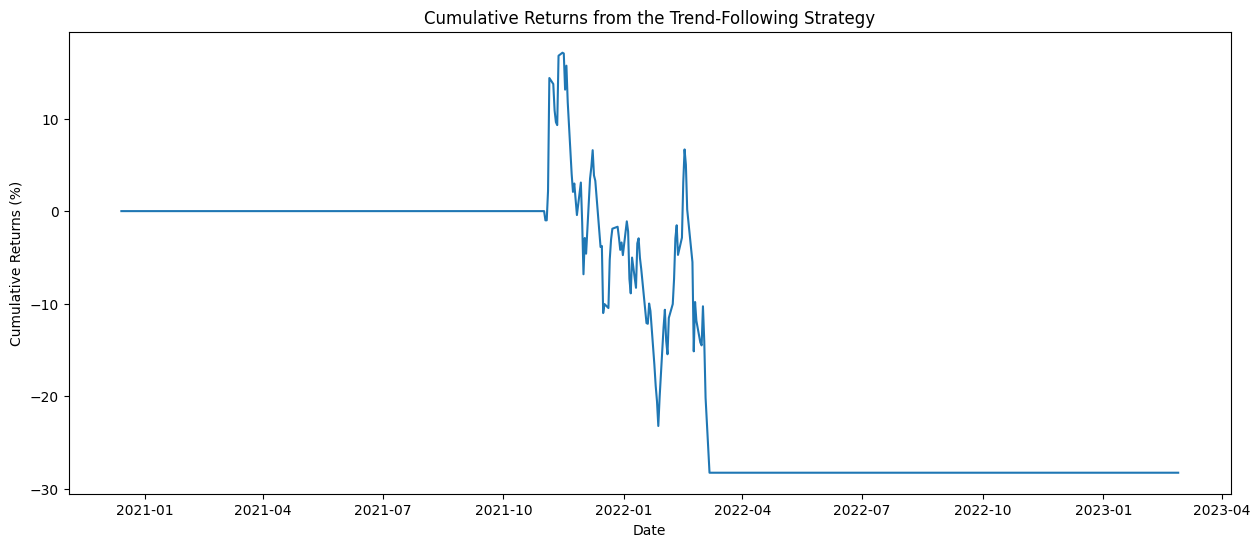

In [34]:
# Visual of the cumulative returns

plt.plot(cumulative_returns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Cumulative Returns from the Trend-Following Strategy')
plt.show()

## **Insights from the trading strategies**

I formulated two trading strategies:

*   Mean Reversion Trading Strategy
*   Trend Following Trading Strategy

The mean reversion trading strategy did much better than the trend following strategy. The total strategy returns for the period using the mean reversion strategy was 3.5% whereas for the trend following strategy it was -28.28%.

**Performance metrics**
I used the Sharpe Ratio and Maximum Drawdown to calculate the performance metrics of the two strategies. The Sharpe Ratio and Maximum Drawdown for the mean reversion trading strategy is -0.12 and -0.34. This means that as much as this trading strategy performed better, it generally performed poorly and has a high risk. The Sharpe Ratio value was not enough to cover the risk taken and the Maximum drawdown value suggests that the portfolio value has declined by 34% from a previous high.

The Sharpe Ratio and Maximum Drawdown for the trend following strategy is -0.52 and -inf% which means that the strategy gad negative risk-adjusted returns and the portfolio value has decreased to negative infinity. Generally the strategy suffered a catastrophic loss.

# **Forecast with the Mean Reversion Strategy**

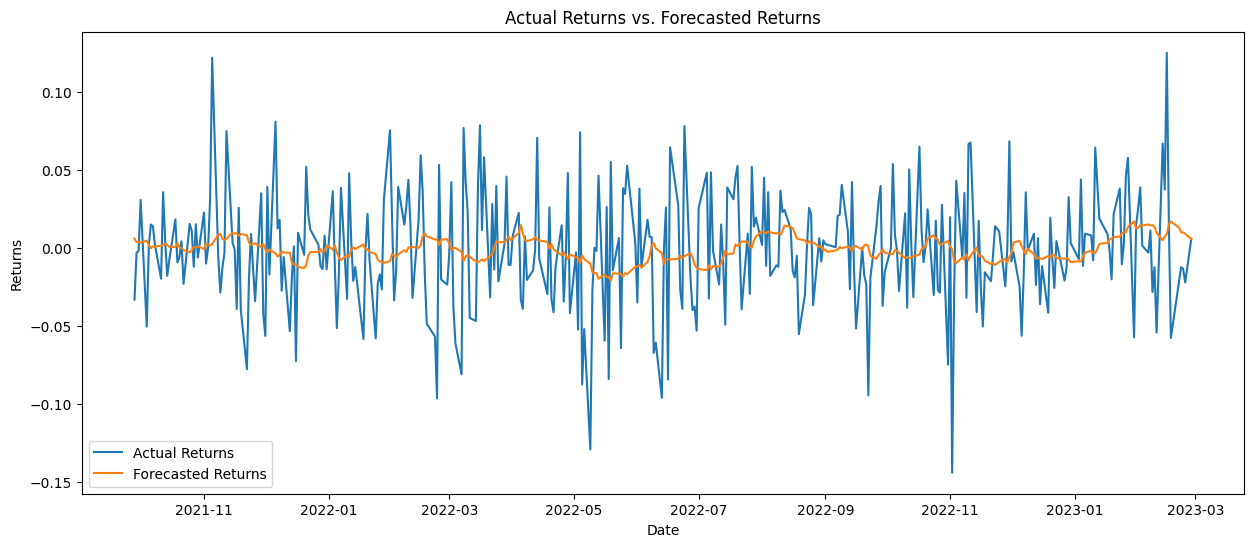

In [35]:
# Forecast future returns with the mean reversion trading strategy

df['Forecast'] = df['Returns'].rolling(window=20).mean()
df['Forecast'] = df['Forecast'].shift(1)
df.dropna(inplace=True)

# Plot the actual returns and the forecast
plt.plot(df['Returns'], label='Actual Returns')
plt.plot(df['Forecast'], label='Forecasted Returns')
plt.legend(loc='best')
plt.title('Actual Returns vs. Forecasted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()



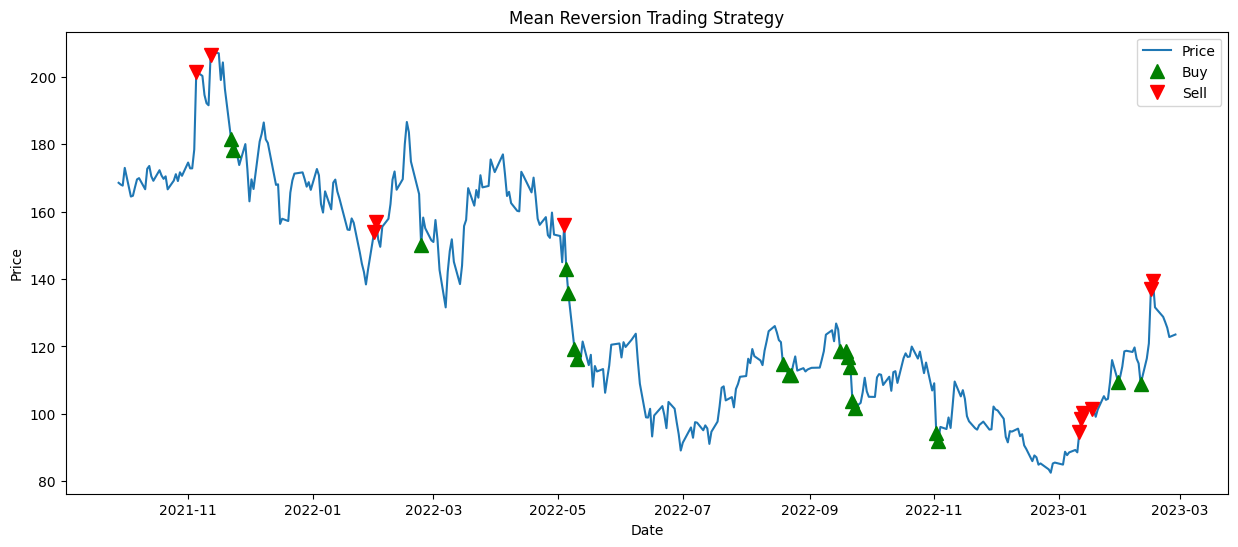

In [36]:
#Apply the mean reversion strategy and plot the buy and sell signals

plt.plot(df['Adj Close'], label='Price')
plt.plot(df[df['Positions'] == 1].index, df['Adj Close'][df['Positions'] == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(df[df['Positions'] == -1].index, df['Adj Close'][df['Positions'] == -1], 'v', markersize=10, color='r', label='Sell')
plt.title('Mean Reversion Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

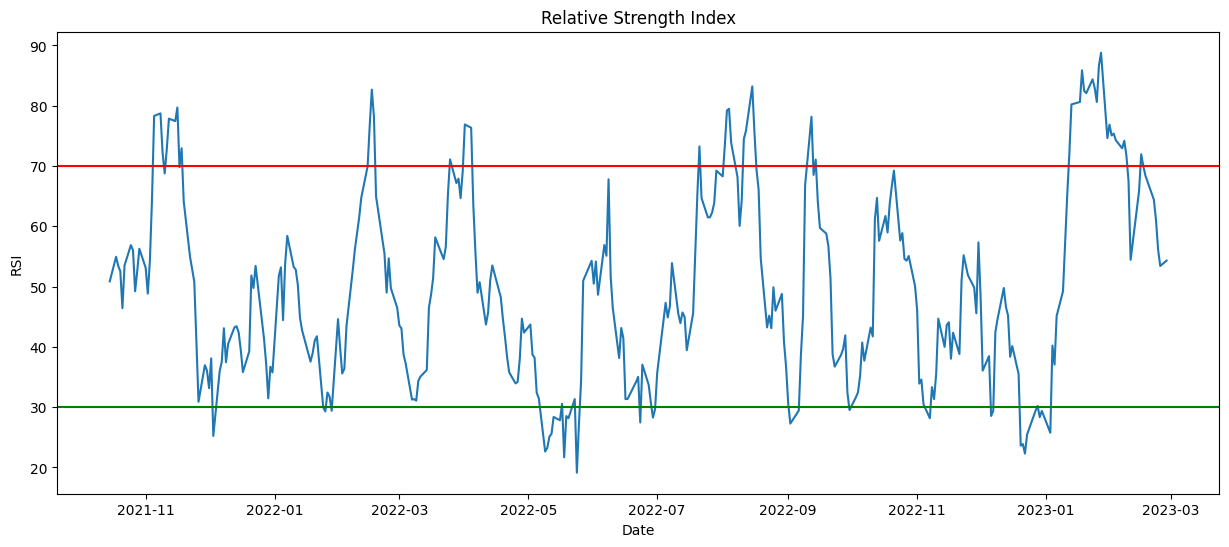

In [37]:
# Calculate the RSI over a 14-day time period to check periods when the stock was overbought or oversold
time_period = 14
delta = abnb_data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=time_period).mean()
average_loss = loss.rolling(window=time_period).mean()
relative_strength = average_gain / average_loss
rsi = 100.0 - (100.0 / (1.0 + relative_strength))

# Plot the RSI chart
fig, ax = plt.subplots()
ax.plot(abnb_data.index, rsi)
ax.axhline(y=70, color='r', linestyle='-')
ax.axhline(y=30, color='g', linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.set_title('Relative Strength Index')
plt.show()

## **Conclusion**

The mean reversion strategy was the best performer in trading strategies for the Air BnB stock data. The buy and sell signals give an indication on when to buy and sell the stock.

The RSI index chart is a trading indicator that shows when the stock were overbought(data points above the red line) this prices start to decline thus an investor should sell. The data points that are below the green line shows that the stock has been oversold and the prices will begin to rise which is a sign to buy.

I would however advise for an investor to adding another stock to this portfolio as the returns from Air BNB are low.




### *Happy investing!*

